In [126]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import linalg as LA
from matplotlib.colors import LogNorm

## generate data

In [168]:
#function to generate a spectrum with energy detuning:

def get_spectrum(E_detuning): #in keV
    #1. take sample spectrum
    #2. take detuned masked spectrum
    #3. convolute and get the image at the detector
    #4. GET A LIST of images with different detunings
    
    #1. sample spectrum
    
    w=np.linspace(10,20,100) #RANGE OF FREQUENCIES in keV
    sample_w_0= 15 #(keV)
    sample_fwhm_0= 1 #keV 
    
    sample_amp = 1/(1+4*(w-sample_w_0)**2/sample_fwhm_0**2) #normalised
    #sample_amp = 1/np.pi* (0.5*sample_fwhm_0/((w-sample_w_0)**2 +(0.5*sample_fwhm_0)**2) ) # from wolfram mathematica definition 
    sample_phase = np.pi/(1+np.exp(-2*(w-sample_w_0)))


    #mask spectrum  
    mask_w_0= 15 #(keV)
    mask_fwhm_0= 1 #neV
    mask_amp = 1/(1+4*(w-(mask_w_0+E_detuning))**2/mask_fwhm_0**2)
    #mask_amp = 1/np.pi* (0.5*mask_fwhm_0/((w-(mask_w_0+E_detuning))**2 +(0.5*mask_fwhm_0)**2) ) # from wolfram mathematica definition
    mask_phase = np.pi/(1+np.exp(-2*(w-(mask_w_0+E_detuning))))

    sample_data = sample_amp*np.exp(1j*sample_phase)
    mask_data   = mask_amp*np.exp(1j*mask_phase)
    
    exp_data= sample_data*mask_data
    detector_img= sample_data
    #detector_img= np.abs(np.fft.ifft(exp_data))**2

    img_freq = np.linspace(0,1/w[1]*4135, len(exp_data)) # the plot of time for the ifft
    
    return img_freq,detector_img,mask_data

In [169]:
#simulate experimental data
img_data=[]
detuned_mask_data =[]

for E_detuning in np.linspace(-1.5,1.5,50): #detuning unit in gamma, 50 copies of detuned measurements
    w, ydata, mask_data = get_spectrum(E_detuning)
    img_data.append(ydata)
    detuned_mask_data.append(mask_data)

measured_data_list=np.stack(img_data, axis=0) #50 Real measured Intensity spectra
mask_data_list = np.stack(detuned_mask_data, axis=0) #50 Complex Mask spectra

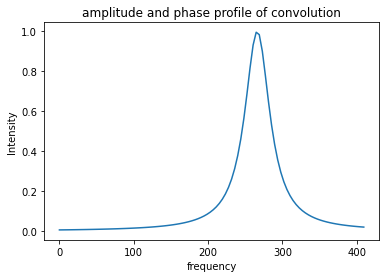

In [170]:
i=20
fig,ax= plt.subplots()
#ax.plot(w, np.angle(measured_data_list[i]))
ax.plot(w, abs(mask_data_list[49]))
#ax.plot(w, exp_phase)
ax.set(xlabel = "frequency",
       ylabel = "Intensity",
       title = "amplitude and phase profile of convolution")
plt.show()

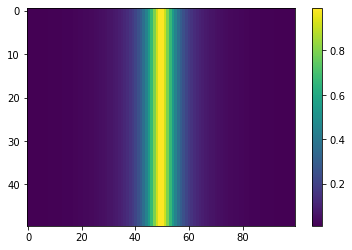

In [171]:

plt.imshow(np.abs(measured_data_list),interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

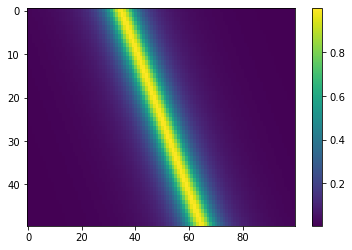

In [172]:
plt.imshow(np.abs(mask_data_list),interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

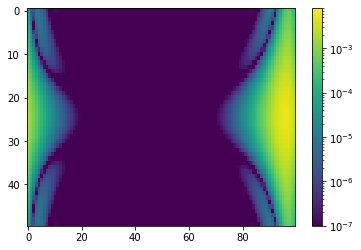

In [164]:
plt.imshow(np.abs( np.fft.ifft(   mask_data_list.dot(np.diag(measured_data_list[0]) )  )   )**2,interpolation='none',aspect='auto',norm = LogNorm(1e-7,0.008)  )
plt.colorbar()
plt.show()